In [4]:
# 04/14/2020
# Aline Jaimes

# Analysis
#   Background. Moisture affects irradiance sensor and affects data quality
# It is worse when snow covers the panel because it is basically
# moisture in transition period (Dew/Fog).
#   Goal. Analyze moisture in the air.
# From those parameters temperature/ humidity/pressure/ 
# Determine the probable status or dew point.
# Come up with some opinion about the probabily 
# that the moisture in the air is condensed(fog, mist, dew)
#
# Dewpoint calculation
#Historical_OWS_Data.csv


In [1]:
# 1. Import dependencies
import os
import csv
import sys
import math
import pyowm
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import string as string
from datetime import time
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read data from source
link = 'http://history.openweathermap.org/storage/7a3518ab9c9f85a9de46a25b714d3ee0.csv'
# Read file
df = pd.read_csv(link)

In [3]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [6]:
# Create a group based on the values in the 'CityName' column
SitesClasses = df.groupby('city_name')
SitesClasses

In [7]:
## Count how weather description are in a group
count_sites = SitesClasses['city_name'].count()
count_sites

city_name
Connexus Athens, MN    365686
DPC Goose Lake, MN     370321
Xcel Gopher, MN        364440
Xcel Richmond, MN      372159
Name: city_name, dtype: int64

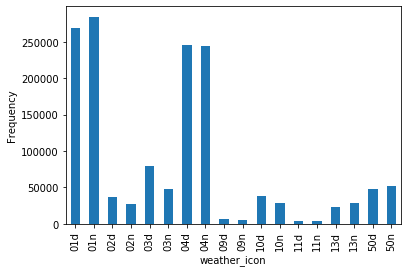

In [10]:
## Create a bar chart based off of the group series from before
count_weather_icon_type= count_weather_icon.plot(kind='bar')
## Set the xlabel and ylabel using class methods
count_weather_icon_type.set_xlabel("weather_icon")
count_weather_icon_type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [11]:
# Create a group based on the values in the 'weather description' column
WeatherDescriptionClasses = df.groupby('weather_main')
## Count how weather description are in a group
count_weather_main = WeatherDescriptionClasses['weather_main'].count()
count_weather_main

weather_main
Clear           553712
Clouds          681303
Drizzle           8143
Dust               104
Fog              48669
Haze             13342
Mist             37763
Rain             70615
Smoke               21
Snow             51447
Thunderstorm      7487
Name: weather_main, dtype: int64

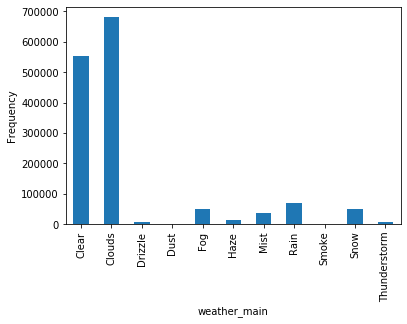

In [12]:
## Create a bar chart based off of the group series from before
count_weather_main_type= count_weather_main.plot(kind='bar')
## Set the xlabel and ylabel using class methods
count_weather_main_type.set_xlabel("weather_main")
count_weather_main_type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [13]:
# Create a group based on the values in the 'weather description' column
WeatherDescriptionClasses = df.groupby('weather_description')

In [14]:
## Count how weather description are in a group
count_WeatherDescription = WeatherDescriptionClasses['weather_description'].count()
count_WeatherDescription


weather_description
 light shower sleet                         1
broken clouds                          111633
drizzle                                  2421
dust                                       98
few clouds                              64485
fog                                     48669
freezing rain                               9
haze                                    13342
heavy intensity drizzle                   199
heavy intensity rain                     3398
heavy intesity shower rain                192
heavy snow                                165
light intensity drizzle                  5504
light intensity shower rain              3105
light rain                              47574
light shower snow                         539
light snow                              45838
mist                                    37763
moderate rain                           15842
overcast clouds                        378022
proximity Sand/Dust Whirls                  6
proximity thun

In [15]:
count_WeatherDescription.head()

weather_description
 light shower sleet         1
broken clouds          111633
drizzle                  2421
dust                       98
few clouds              64485
Name: weather_description, dtype: int64

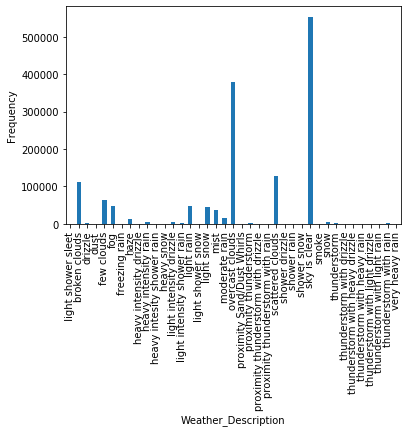

In [16]:
## Create a bar chart based off of the group series from before
count_WeatherDescription_Type= count_WeatherDescription.plot(kind='bar')

## Set the xlabel and ylabel using class methods
count_WeatherDescription_Type.set_xlabel("Weather_Description")
count_WeatherDescription_Type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [17]:
# Calculate DewPoint
t_air_c=df.temp
rel_humidity=df.humidity
A = 17.27
B = 237.7
dp1=(A*df.temp)/(B+df.temp)
m=(df.humidity/100.0)
mlog=np.log2(m)
alpha=(dp1+m)
#alpha = ((A * t_air_c) / (B + t_air_c)) + math.log(rel_humidity/100.0)
dp=(B * alpha) / (A - alpha)    

In [18]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472606 rows and 25 columns


In [19]:
df.describe()

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,1.472606e+06,0.0,0.0,1.472606e+06,1.472606e+06,1.472606e+06,48470.000000,841.000000,14090.000000,157.000000,1.472606e+06,1.472606e+06
mean,9.333845e+08,-1.951942e+04,4.499325e+01,-9.344436e+01,6.963344e+00,3.408902e+00,5.830397e+00,8.093609e+00,1.015819e+03,NaN,NaN,7.260103e+01,3.702121e+00,1.993658e+02,1.129950,2.686552,0.463812,1.226433,4.655570e+01,7.691850e+02
std,3.749974e+08,1.777999e+03,7.698320e-01,6.687359e-01,1.289868e+01,1.494971e+01,1.295474e+01,1.290781e+01,7.912022e+00,NaN,NaN,1.800633e+01,1.995434e+00,9.982646e+01,2.006788,4.336426,0.488565,1.240255,4.148661e+01,9.122574e+01
min,2.839968e+08,-2.160000e+04,4.366577e+01,-9.451385e+01,-3.781000e+01,-4.558000e+01,-3.950000e+01,-3.666000e+01,9.660000e+02,NaN,NaN,1.000000e+00,1.000000e-02,0.000000e+00,0.100000,0.190000,0.100000,0.130000,0.000000e+00,2.000000e+02
25%,6.096537e+08,-2.160000e+04,4.366577e+01,-9.451385e+01,-2.150000e+00,-7.530000e+00,-3.000000e+00,-1.090000e+00,1.011000e+03,NaN,NaN,6.100000e+01,2.100000e+00,1.280000e+02,0.300000,0.500000,0.190000,0.310000,1.000000e+00,8.000000e+02
50%,9.300024e+08,-1.800000e+04,4.545861e+01,-9.329898e+01,7.560000e+00,3.350000e+00,6.430000e+00,8.810000e+00,1.016000e+03,NaN,NaN,7.500000e+01,3.100000e+00,1.920000e+02,0.500000,1.000000,0.300000,1.000000,4.000000e+01,8.000000e+02
75%,1.257145e+09,-1.800000e+04,4.545861e+01,-9.326576e+01,1.762000e+01,1.600000e+01,1.660000e+01,1.890000e+01,1.021000e+03,NaN,NaN,8.700000e+01,4.600000e+00,2.900000e+02,1.190000,3.000000,0.510000,1.000000,9.000000e+01,8.040000e+02
max,1.586905e+09,-1.800000e+04,4.546004e+01,-9.267916e+01,3.946000e+01,4.208000e+01,3.932000e+01,3.980000e+01,1.054000e+03,NaN,NaN,1.000000e+02,2.520000e+01,3.600000e+02,45.200000,41.400000,6.100000,6.250000,1.000000e+02,8.040000e+02


In [70]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['dt'].iloc[0]))))

 start  2014-12-31 18:00:00


In [103]:
time_index = pd.date_range('2014-12-31 18:00:00', periods=47623,  freq='1h')  
new=time_index

In [104]:
df1 = df.set_index(time_index)
#df1

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2014-12-31 18:00:00,1420070400,2015-01-01 00:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.83,-11.87,-11.00,...,230,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2014-12-31 19:00:00,1420074000,2015-01-01 01:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.13,-11.88,-11.00,...,220,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2014-12-31 20:00:00,1420077600,2015-01-01 02:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.76,-18.09,-12.00,-11.48,...,220,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2014-12-31 21:00:00,1420081200,2015-01-01 03:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.24,-17.55,-12.10,-10.00,...,220,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
2014-12-31 22:00:00,1420084800,2015-01-01 04:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-10.75,-17.71,-11.48,-10.00,...,240,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 20:00:00,1586808000,2020-04-13 20:00:00 +0000 UTC,-18000,Connexus Anoka MN,45.234472,-93.480455,0.59,-5.84,-1.11,2.22,...,290,0.64,NaN,NaN,NaN,90,600,Snow,light snow,13d
2020-06-06 21:00:00,1586811600,2020-04-13 21:00:00 +0000 UTC,-18000,Connexus Anoka MN,45.234472,-93.480455,0.80,-6.34,-0.56,2.00,...,260,0.25,NaN,0.51,NaN,90,500,Rain,light rain,10d
2020-06-06 22:00:00,1586811600,2020-04-13 21:00:00 +0000 UTC,-18000,Connexus Anoka MN,45.234472,-93.480455,0.80,-6.34,-0.56,2.00,...,260,0.25,NaN,0.51,NaN,90,601,Snow,snow,13d
2020-06-06 23:00:00,1586815200,2020-04-13 22:00:00 +0000 UTC,-18000,Connexus Anoka MN,45.234472,-93.480455,0.96,-7.35,0.00,2.22,...,290,0.51,NaN,NaN,NaN,90,500,Rain,light rain,10d


In [140]:
# Substitute UNIX time column in dataframe
df1["dt"]= new[0]
df1.head(2)

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2014-12-31 18:00:00,2014-12-31 18:00:00,2015-01-01 00:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.83,-11.87,-11.0,...,230,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2014-12-31 19:00:00,2014-12-31 18:00:00,2015-01-01 01:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.13,-11.88,-11.0,...,220,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n


In [131]:
# INsert dew point in timeframe
df2 = df.set_index(dp)
new1=dp
df2["dt_iso"]= new1[0]
df2.head(2)

In [145]:
df3 = df2.filter(items=['dt', 'city_name', 'lat', 'lon', 'dt_iso','temp', 'feels_like', 'temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','weather_main','weathed_description','weather_icon'])
df3.head(2)
#weather_data.tail()

,dt,city_name,lat,lon,dt_iso,temp,feels_like,temp_min,temp_max,pressure,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_icon
-3.354438,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.83,-11.87,-11.0,1018,...,4.1,230,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.354438,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.13,-11.88,-11.0,1018,...,3.1,220,NaN,NaN,NaN,NaN,1,800,Clear,01n


In [174]:
df3.rename(columns={
    "dt": "Datetime",
    "city_name": "CityName",
    "lat": "Latitude",
    "lon": "Longitude",
    "dt_iso":"DewPoint",
    "temp": "Temperature",
    "feels_like": "Feels_Like",
    "temp_min": "Min_Temperature",
    "temp_max": "Max_Temperature",
    "pressure": "Pressure",
    "humidity": "Humidity",
    "wind_speed": "WindSpeed",
    "rain_1h": "Rain_1h",
    "rain_3h": "Rain_3h",
    "snow_1h": "Snow_1h",
    "snow_3h": "Snow_3h",
    "clouds_all": "Clouds",
    "weather_id": "WeatherID",
    "weather_main": "WeatherMain",
    "weather_icon": "WeatherIcon"})
    

,Datetime,CityName,Latitude,Longitude,DewPoint,Temperature,Feels_Like,Min_Temperature,Max_Temperature,Pressure,...,WindSpeed,wind_deg,Rain_1h,Rain_3h,Snow_1h,Snow_3h,Clouds,WeatherID,WeatherMain,WeatherIcon
-3.354438,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.83,-11.87,-11.00,1018,...,4.1,230,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.354438,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.13,-11.88,-11.00,1018,...,3.1,220,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.243161,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.76,-18.09,-12.00,-11.48,1018,...,4.1,220,NaN,NaN,NaN,NaN,75,803,Clouds,04n
-2.683170,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.24,-17.55,-12.10,-10.00,1017,...,4.1,220,NaN,NaN,NaN,NaN,90,804,Clouds,04n
-1.749241,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-10.75,-17.71,-11.48,-10.00,1017,...,5.1,240,NaN,NaN,NaN,NaN,90,804,Clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.285216,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.59,-5.84,-1.11,2.22,1011,...,5.7,290,0.64,NaN,NaN,NaN,90,600,Snow,13d
8.820624,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.80,-6.34,-0.56,2.00,1011,...,6.2,260,0.25,NaN,0.51,NaN,90,500,Rain,10d
8.820624,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.80,-6.34,-0.56,2.00,1011,...,6.2,260,0.25,NaN,0.51,NaN,90,601,Snow,13d
8.105281,2014-12-31 18:00:00,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.96,-7.35,0.00,2.22,1012,...,7.7,290,0.51,NaN,NaN,NaN,90,500,Rain,10d


In [175]:
df3.columns

Index(['dt', 'city_name', 'lat', 'lon', 'dt_iso', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_icon'],
      dtype='object')

Text(0.5, 1.0, 'Temperature')

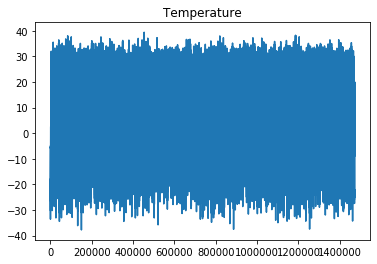

In [20]:
fig, ax = plt.subplots()
ax.plot(df.temp)
ax.set_title('Temperature')

Text(0.5, 1.0, 'Temperature_Min')

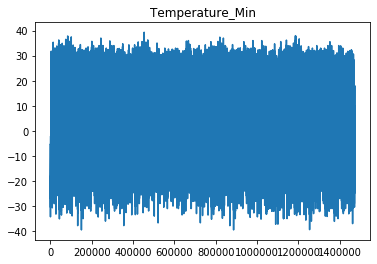

In [21]:
fig, ax = plt.subplots()
ax.plot(df.temp_min)
ax.set_title('Temperature_Min')

Text(0.5, 1.0, 'Temperature_Max')

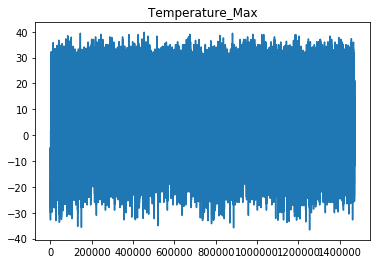

In [22]:
fig, ax = plt.subplots()
ax.plot(df.temp_max)
ax.set_title('Temperature_Max')

Text(0.5, 1.0, 'Humidity')

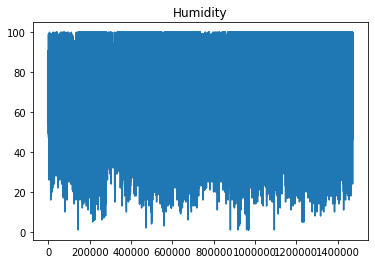

In [23]:
fig, ax = plt.subplots()
ax.plot(df.humidity)
ax.set_title('Humidity')

Text(0.5, 1.0, 'Pressure')

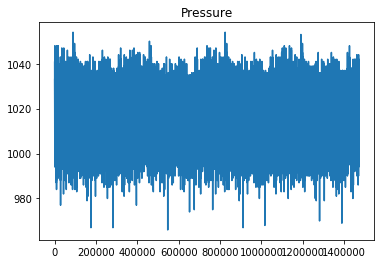

In [24]:
fig, ax = plt.subplots()
ax.plot(df.pressure)
ax.set_title('Pressure')

In [ ]:
'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_al

Text(0.5, 1.0, 'wind_speed')

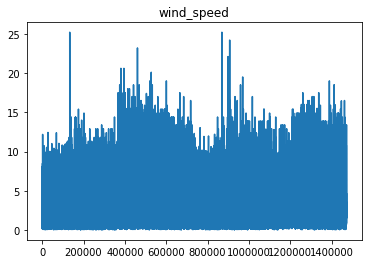

In [25]:
fig, ax = plt.subplots()
ax.plot(df.wind_speed)
ax.set_title('wind_speed')

Text(0.5, 1.0, 'wind_deg')

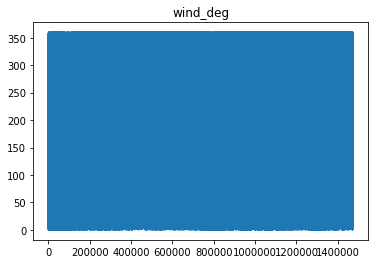

In [26]:
fig, ax = plt.subplots()
ax.plot(df.wind_deg)
ax.set_title('wind_deg')

Text(0.5, 1.0, 'dew_point')

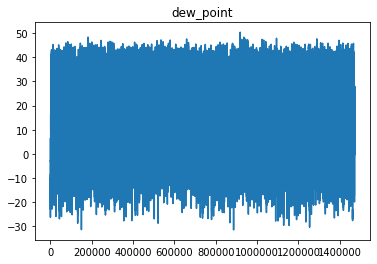

In [27]:
fig, ax = plt.subplots()
ax.plot(dp)
ax.set_title('dew_point')

In [173]:
# Saving datatable into a csv file
df4.to_csv('ConnexusAnokaMN.csv',index=False)